In [1]:
from results import rate_attacked, attacked_by_bins
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
datasets = [
    {
        'absp': '../__histology',
        'label': 'Histology Camelyon',
        'color': 'C1'
    },
    {
        'absp': '../__aorta_razv',
        'label': 'Aorta',
        'color': 'C2'
    },
    {
        'absp': '../__xray',
        'label': 'Xray with noise',
        'color': 'C3'
    },
    {
        'absp': '../__histology_tifs_2classes_thyroid',
        'label': 'Histology thyroid',
        'color': 'C4'
    },
    {
        'absp': '../__histology_tifs_2classes_ovary',
        'label': 'Histology ovary',
        'color': 'C5'
    }
]

In [3]:
# update datasets with attacks results
for dataset in datasets:
    dataset.update({
        'rate_attacked': numpy.array(rate_attacked(dataset['absp'])),
        'attacked_by_bins': numpy.array(attacked_by_bins(dataset['absp']))
    })

(20, 10, 30000, 2) float64
(20, 10, 30000, 2) float64
(20, 10, 5400, 2) float32
(20, 10, 5400, 2) float32
(20, 10, 544, 2) float32
(20, 10, 544, 2) float32
(20, 10, 19072, 2) float32
(20, 10, 19072, 2) float32
(20, 10, 19200, 2) float32
(20, 10, 19200, 2) float32


In [8]:
# Show single dataset results in details (with many iterations and etc.)
dataset = datasets[1]

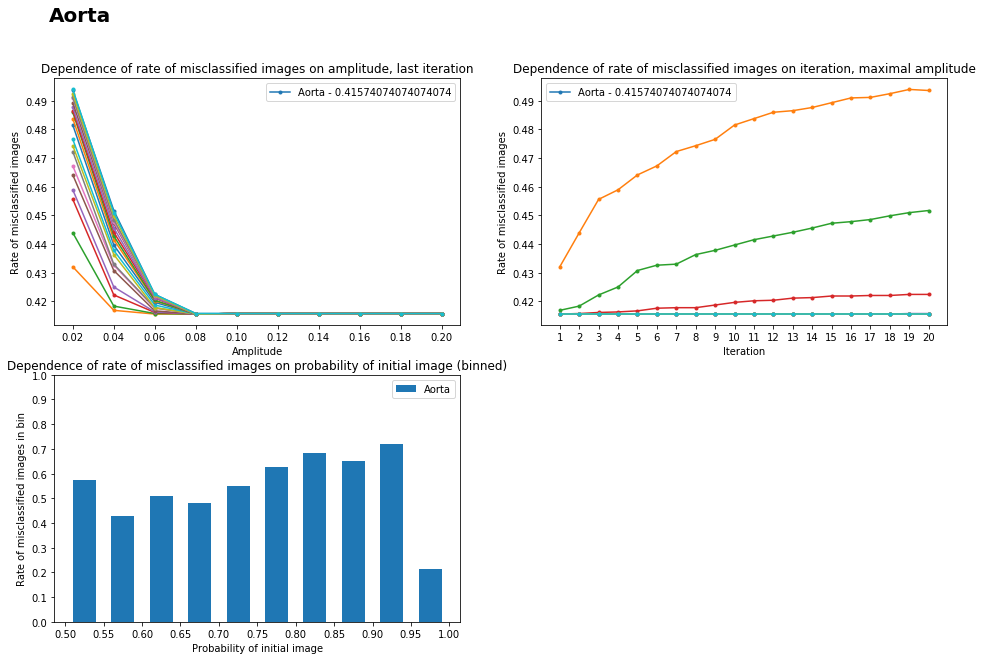

In [9]:
rate_res = dataset['rate_attacked']
bins_res = dataset['attacked_by_bins']

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
fig.delaxes(ax[1][1])
fig.suptitle(dataset['label'], x=0.12, ha='left', size=20, weight='bold')
# Show rate_attacked, dependence on epsilon
x, y = rate_res[-1]
# display last iteration labeled
ax[0][0].plot(x, y, '.-', label='{} - {}'.format(dataset['label'], str(y[len(y) - 1])))
# display all other iterations
for x, y in rate_res[: -1]:
    ax[0][0].plot(x, y, '.-')
ax[0][0].set_xticks(x)
ax[0][0].legend()
ax[0][0].set_title('Dependence of rate of misclassified images on amplitude, last iteration')
ax[0][0].set_xlabel('Amplitude')
ax[0][0].set_ylabel('Rate of misclassified images')

# Show rate_attacked, dependence on iteration
x = numpy.arange(1, len(rate_res) + 1)
y = rate_res[:, 1, -1]
# display maximal epsilon
ax[0][1].plot(x, y, '.-', label='{} - {}'.format(dataset['label'], str(y[len(y) - 1])))
# display all others
for y in numpy.rollaxis(rate_res[:, 1, : -1], 1):
    ax[0][1].plot(x, y, '.-')
ax[0][1].set_xticks(x)
ax[0][1].legend()
ax[0][1].set_title('Dependence of rate of misclassified images on iteration, maximal amplitude')
ax[0][1].set_xlabel('Iteration')
ax[0][1].set_ylabel('Rate of misclassified images')

# Show attacked by bins
# Use maximal epsilon and last iteration
x = numpy.arange(0.5, 1.05, 0.05)
y = bins_res[-1, -1]
ax[1][0].bar(x[: -1] + 0.01, y, align='edge', width=0.03, label=dataset['label'])
ax[1][0].set_xticks(x)
ax[1][0].set_yticks(numpy.arange(0, 1.1, 0.1))
ax[1][0].legend()
ax[1][0].set_title('Dependence of rate of misclassified images on probability of initial image (binned)')
ax[1][0].set_xlabel('Probability of initial image')
ax[1][0].set_ylabel('Rate of misclassified images in bin');

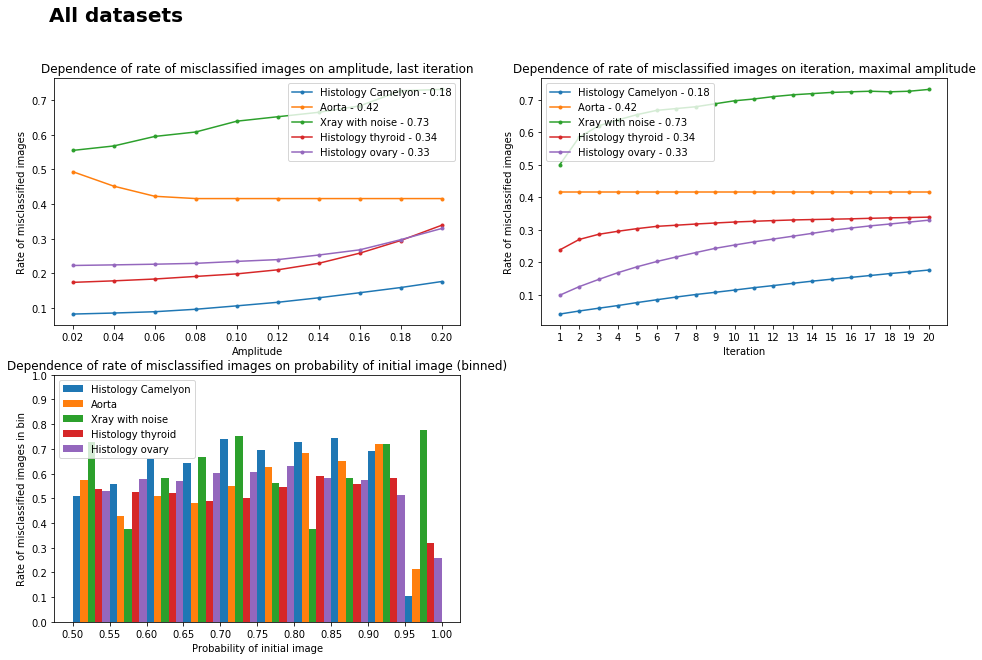

In [11]:
# Show results for all datasets together (main information, not detaily)

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
fig.delaxes(ax[1][1])
fig.suptitle('All datasets', x=0.12, ha='left', size=20, weight='bold')
for i, dataset in enumerate(datasets):
    rate_res = dataset['rate_attacked']
    bins_res = dataset['attacked_by_bins']
    # Show rate_attacked, dependence on epsilon
    x, y = rate_res[-1]
    ax[0][0].plot(x, y, '.-', label='{0} - {1:0.2}'.format(dataset['label'], y[len(y) - 1]))

    # Show rate_attacked, dependence on iteration
    x = numpy.arange(1, len(rate_res) + 1)
    y = rate_res[:, 1, -1]
    ax[0][1].plot(x, y, '.-', label='{0} - {1:0.2}'.format(dataset['label'], y[len(y) - 1]))

    # Show attacked by bins
    # Use maximal epsilon and last iteration
    x = numpy.arange(0.5, 1.05, 0.05)
    y = bins_res[-1, -1]
    ax[1][0].bar(x[: -1] + i * 0.01, y, align='edge', width=0.01, label=dataset['label'])
    
    
ax[0][0].set_xticks(numpy.arange(0.02, 0.22, 0.02))
ax[0][0].legend()
ax[0][0].set_title('Dependence of rate of misclassified images on amplitude, last iteration')
ax[0][0].set_xlabel('Amplitude')
ax[0][0].set_ylabel('Rate of misclassified images')

ax[0][1].set_xticks(numpy.arange(1, 21, 1))
ax[0][1].legend()
ax[0][1].set_title('Dependence of rate of misclassified images on iteration, maximal amplitude')
ax[0][1].set_xlabel('Iteration')
ax[0][1].set_ylabel('Rate of misclassified images')

ax[1][0].set_xticks(numpy.arange(0.5, 1.05, 0.05))
ax[1][0].set_yticks(numpy.arange(0, 1.1, 0.1))
ax[1][0].legend()
ax[1][0].set_title('Dependence of rate of misclassified images on probability of initial image (binned)')
ax[1][0].set_xlabel('Probability of initial image')
ax[1][0].set_ylabel('Rate of misclassified images in bin');

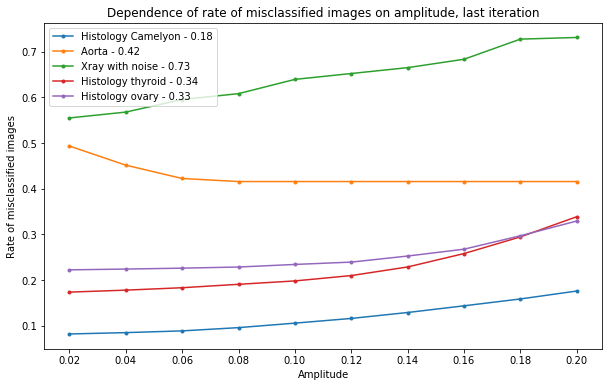

In [21]:
# Show each plot separately
fig = plt.figure(figsize=[10,6])

for i, dataset in enumerate(datasets):
    rate_res = dataset['rate_attacked']
    bins_res = dataset['attacked_by_bins']
    x, y = rate_res[-1]
    plt.plot(x, y, '.-', label='{0} - {1:0.2}'.format(dataset['label'], y[len(y) - 1]))

plt.xticks(numpy.arange(0.02, 0.22, 0.02))
plt.legend()
plt.title('Dependence of rate of misclassified images on amplitude, last iteration')
plt.xlabel('Amplitude')
plt.ylabel('Rate of misclassified images')
plt.show()

fig.savefig('plots/Rate_attacked_all_by_eps.png')

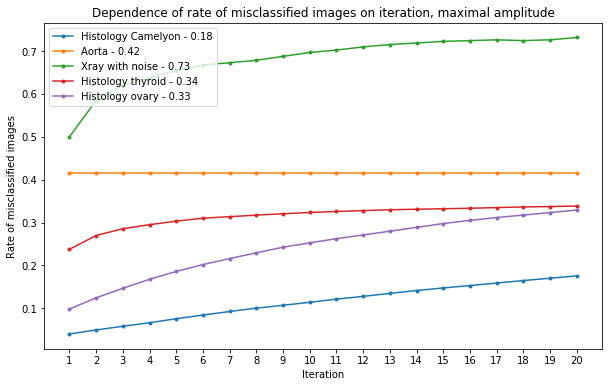

In [22]:
fig = plt.figure(figsize=[10,6])

for i, dataset in enumerate(datasets):
    rate_res = dataset['rate_attacked']
    bins_res = dataset['attacked_by_bins']
    x = numpy.arange(1, len(rate_res) + 1)
    y = rate_res[:, 1, -1]
    plt.plot(x, y, '.-', label='{0} - {1:0.2}'.format(dataset['label'], y[len(y) - 1]))

plt.xticks(numpy.arange(1, 21, 1))
plt.legend()
plt.title('Dependence of rate of misclassified images on iteration, maximal amplitude')
plt.xlabel('Iteration')
plt.ylabel('Rate of misclassified images')
plt.show()

fig.savefig('plots/Rate_attacked_all_by_iteration.png')

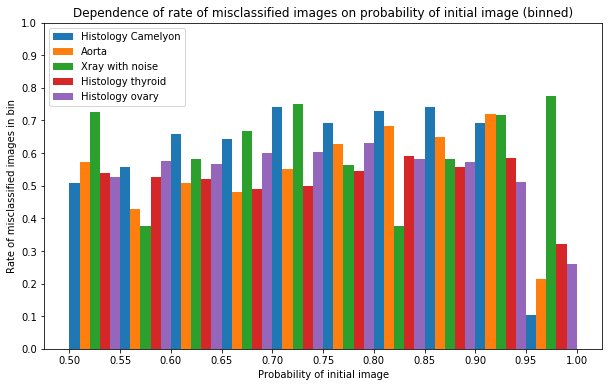

In [23]:
fig = plt.figure(figsize=[10,6])

for i, dataset in enumerate(datasets):
    rate_res = dataset['rate_attacked']
    bins_res = dataset['attacked_by_bins']
    x = numpy.arange(0.5, 1.05, 0.05)
    y = bins_res[-1, -1]
    plt.bar(x[: -1] + i * 0.01, y, align='edge', width=0.01, label=dataset['label'])

plt.xticks(numpy.arange(0.5, 1.05, 0.05))
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.legend()
plt.title('Dependence of rate of misclassified images on probability of initial image (binned)')
plt.xlabel('Probability of initial image')
plt.ylabel('Rate of misclassified images in bin');
plt.show()

fig.savefig('plots/Rate_attacked_all_by_bins.png')